In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Încarcă baza de date
file_path = r'D:\machinelearning\data\dataset.csv'
data = pd.read_csv(file_path)

# Afișăm baza de date inițială
print("Baza de date inițială:")
print(data.head())

# Eliminăm coloana 'name' pentru a evita erorile
data = data.drop(columns=['name'])

# Transformăm coloana 'seller_type' conform cerințelor
data['seller_type'] = data['seller_type'].apply(lambda x: 0 if x == 'Individual' else 1)

# Împărțim coloana 'owner' în mai multe coloane cu valori 0 sau 1
owners = pd.get_dummies(data['owner'], prefix='owner')
owners = owners.astype(int)  # Convertim True și False în 1 și 0
data = pd.concat([data, owners], axis=1)
data.drop(columns=['owner'], inplace=True)

# Afisăm primele câteva rânduri din baza de date după modificările la 'seller_type' și 'owner'
print("\nPrimele câteva rânduri din baza de date după modificările la 'seller_type' și 'owner':")
print(data.head())

# Codificăm variabilele categorice utilizând codificarea one-hot pentru 'seller_type'
data = pd.get_dummies(data, columns=['seller_type'])

# Afisăm primele câteva rânduri din baza de date după codificarea variabilelor categorice
print("\nPrimele câteva rânduri din baza de date după codificarea variabilelor categorice:")
print(data.head())

# Convertim coloanele relevante în tipuri de date numerice
data['selling_price'] = pd.to_numeric(data['selling_price'], errors='coerce')
data['km_driven'] = pd.to_numeric(data['km_driven'], errors='coerce')
data['ex_showroom_price'] = pd.to_numeric(data['ex_showroom_price'], errors='coerce')

# Calculăm matricea de corelație
correlation_matrix = data.corr()

# Afișăm matricea de corelație
print("\nMatricea de corelație:")
print(correlation_matrix)



Baza de date inițială:
                                    name  selling_price  year seller_type  \
0            'Royal Enfield Classic 350'         175000  2019  Individual   
1                            'Honda Dio'          45000  2017  Individual   
2  'Royal Enfield Classic Gunmetal Grey'         150000  2018  Individual   
3    'Yamaha Fazer FI V 2.0 [2016-2018]'          65000  2015  Individual   
4                'Yamaha SZ [2013-2014]'          20000  2011  Individual   

         owner  km_driven ex_showroom_price  
0  '1st owner'        350                 ?  
1  '1st owner'       5650                 ?  
2  '1st owner'      12000          148114.0  
3  '1st owner'      23000           89643.0  
4  '2nd owner'      21000                 ?  

Primele câteva rânduri din baza de date după modificările la 'seller_type' și 'owner':
   selling_price  year  seller_type  km_driven ex_showroom_price  \
0         175000  2019            0        350                 ?   
1          450

In [11]:
def gini_index(data):
    # Sortăm valorile în ordine crescătoare
    sorted_data = np.sort(data)
    n = len(sorted_data)
    # Calculăm suma diferențelor absolute între fiecare pereche de valori
    absolute_diff_sum = np.abs(sorted_data[:, np.newaxis] - sorted_data).sum()
    # Calculăm suma totală a valorilor
    total_sum = sorted_data.sum()
    # Calculăm indicele Gini
    gini = absolute_diff_sum / (2 * n * total_sum)
    return gini

# Calculăm indicele Gini pentru caracteristica "selling_price"
gini_selling_price = gini_index(data['selling_price'].values)

print("Indicele Gini pentru caracteristica 'selling_price':", gini_selling_price)


Indicele Gini pentru caracteristica 'selling_price': 0.40093933117428077


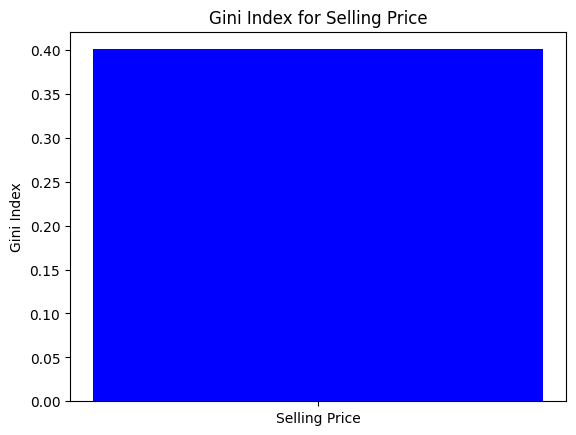

In [12]:
# Vizualizare grafic pentru indicele Gini
plt.bar(['Selling Price'], [gini_selling_price], color='blue')
plt.ylabel('Gini Index')
plt.title('Gini Index for Selling Price')
plt.show()

In [13]:
# Definim o funcție pentru calculul entropiei informaționale
def information_entropy(data):
    # Calculăm probabilitățile pentru fiecare valoare unică
    probabilities = np.bincount(data) / len(data)
    # Eliminăm valorile zero
    probabilities = probabilities[probabilities > 0]
    # Calculăm entropia informațională
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Calculăm entropia informațională pentru caracteristica "selling_price"
entropy_selling_price = information_entropy(data['selling_price'].values)

print("Entropia informațională pentru caracteristica 'selling_price':", entropy_selling_price)

Entropia informațională pentru caracteristica 'selling_price': 5.691179986121789


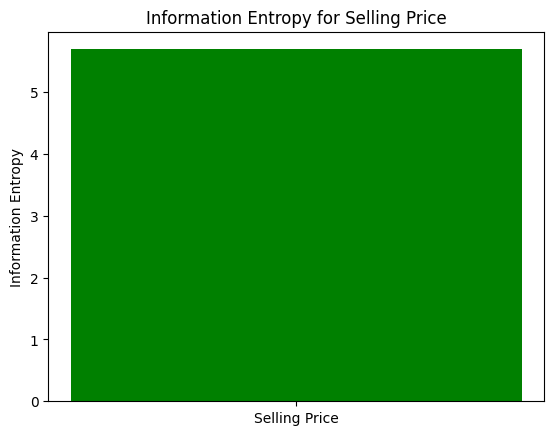

In [14]:
# Vizualizare grafic pentru entropie
plt.bar(['Selling Price'], [entropy_selling_price], color='green')
plt.ylabel('Information Entropy')
plt.title('Information Entropy for Selling Price')
plt.show()

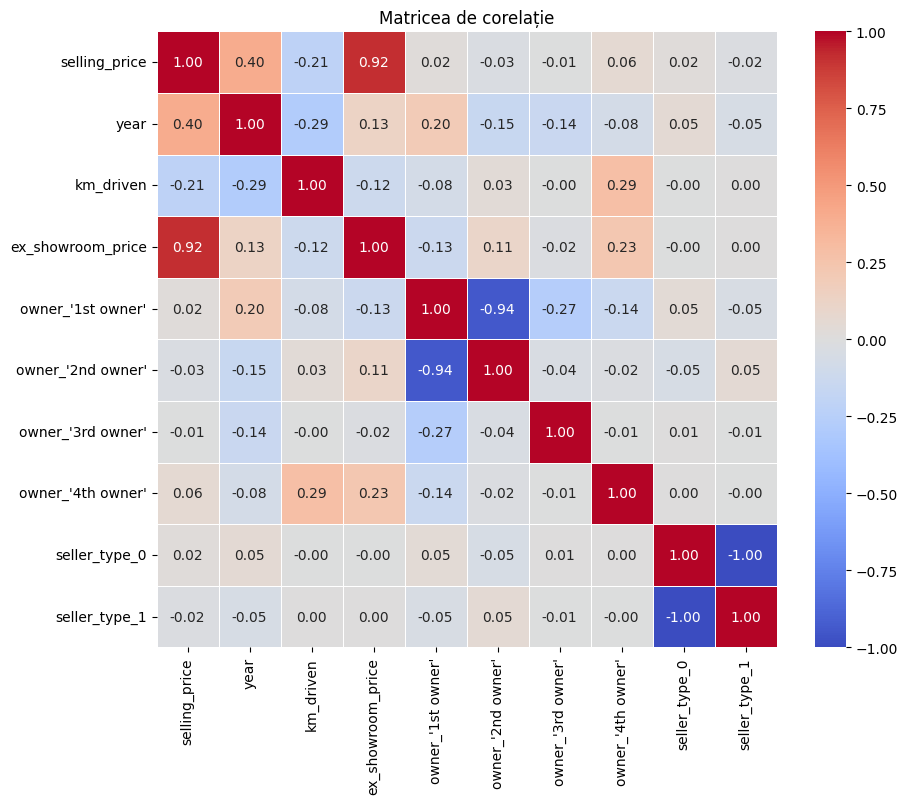

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matricea de corelație')
plt.show()


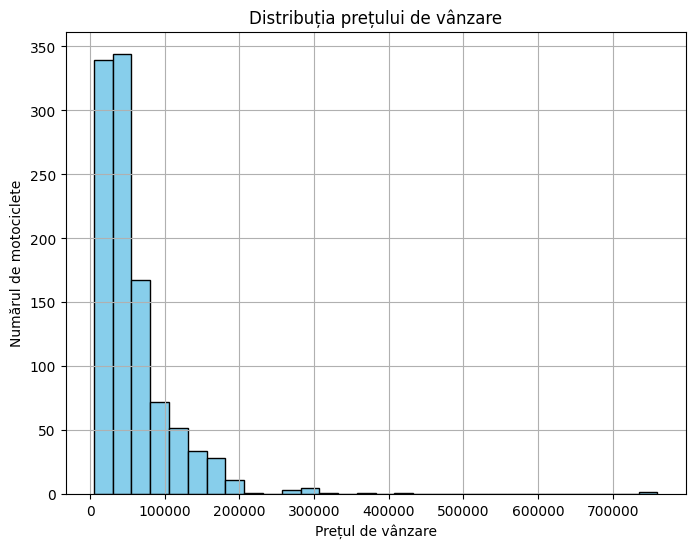

In [16]:
plt.figure(figsize=(8, 6))
plt.hist(data['selling_price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuția prețului de vânzare')
plt.xlabel('Prețul de vânzare')
plt.ylabel('Numărul de motociclete')
plt.grid(True)
plt.show()


C:\Users\Razvan Iacob\AppData\Local\Temp\ipykernel_18120\1500478490.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='seller_type_1', data=data, palette='Set2')


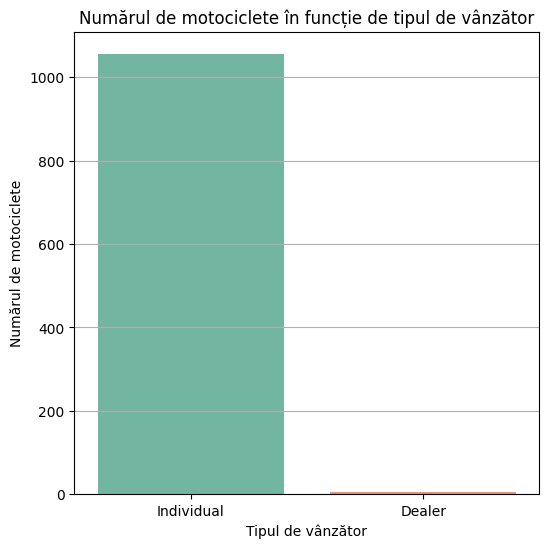

In [17]:
plt.figure(figsize=(6, 6))
sns.countplot(x='seller_type_1', data=data, palette='Set2')
plt.title('Numărul de motociclete în funcție de tipul de vânzător')
plt.xlabel('Tipul de vânzător')
plt.ylabel('Numărul de motociclete')
plt.xticks(ticks=[0, 1], labels=['Individual', 'Dealer'])
plt.grid(axis='y')
plt.show()



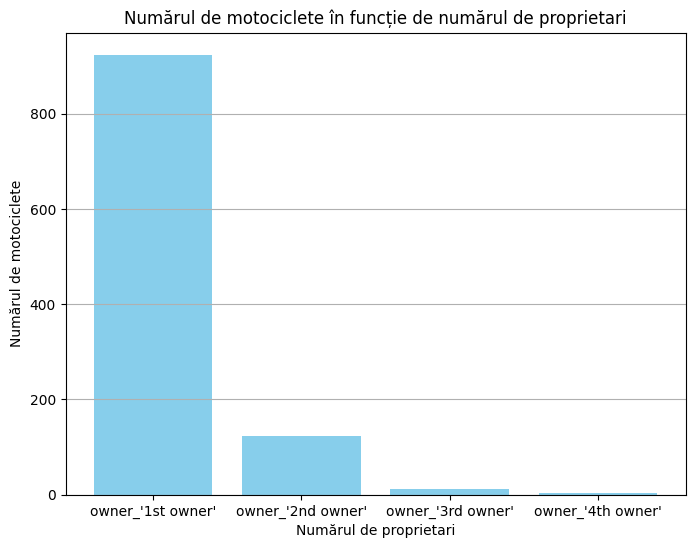

In [18]:
owner_columns = [col for col in data.columns if 'owner_' in col]
owner_counts = data[owner_columns].sum()
plt.figure(figsize=(8, 6))
plt.bar(owner_counts.index, owner_counts.values, color='skyblue')
plt.title('Numărul de motociclete în funcție de numărul de proprietari')
plt.xlabel('Numărul de proprietari')
plt.ylabel('Numărul de motociclete')
plt.grid(axis='y')
plt.show()
